Oswaldo Ordaz 728654

Instituto Tecnológico y de Estudios Superiores de Occidente – ITESO

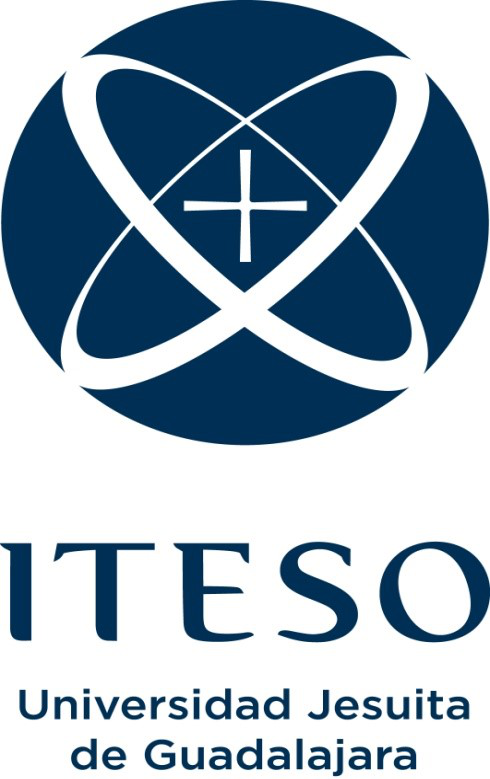

In [16]:
i



    Materia: 	Simulación Matemática
    Maestro: 	GABRIEL ALEJANDRO MORALES RUIZ

	Fecha: 	20/09/23 
	Autor:	Oswaldo Ordaz Madrazo


In [17]:
from PIL import Image
i = Image.open("D:\Descargas\iteso.jpg",'r')

## Administración Mensual de un Acuario

Propuesta de proyecto: 
La propuesta es administrar un presupuesto mensual de un acuario: 
- Mantenimiento
- Rotación de animales
- Comida
- Servicios médicos
- Salarios

Todo esto teniendo una base presupuestal de 2.4 millones mensuales, ya que la administración pasada gastaba 2.7 millones mensuales y lo que se quiere buscar es una cotización mas económica, y también se tiene a la competencia que ellos gastan 1.9 millones.


<table>
  <tr>
      <th>Gastos</th>
      <th>Nosotros</th>
      <th>Pasado</th>
      <th>Competencia</th>
      <th>Gasto Optimo</th>
  </tr>
  <tr>
      <th>Mantenimiento</th>
      <td>450,000</td>
      <td>380,000</td>
      <td>260,000</td>
      <td>310,000</td>
  </tr>
  <tr style="border-bottom: 1px solid #000;">
      <th>Rotacion de animales</th>
      <td>670,000</td>
      <td>850,000</td>
      <td>450,000</td>
      <td>740,000</td>
  </tr>
  <tr style="border-bottom: 1px solid #000;">
      <th>Comida</th>
      <td>480,000</td>
      <td>700,000</td>
      <td>450,000</td>
      <td>540,000</td>
  </tr>

  <tr style="border-bottom: 1px solid #000;">
      <th>Servicios Medicos</th>
      <td> 500,000</td>
      <td> 420,000</td>
      <td> 410,000 </td>
      <td> 450,000 </td>
  </tr>
  <tr style="border-bottom: 1px solid #000;">
      <th>Salarios</th>
      <td>300,000</td>
      <td>350,000</td>
      <td>330,000</td>
      <td>370,000</td>
  </tr>
  <tr style="border-bottom: 1px solid #000;">
      <th>Gastos totales</th>
      <td> 2,400,000</td>
      <td> 2,700,000</td>
      <td> 1,900,000 </td>
      <td>  </td>
  </tr>
</table>

Modelo que representa el problema:
- Optimización buscando mínimos


Objetivos por alcanzar
- Reducir los gastos en todas la áreas y buscar los precios mas baratos en algunas de las mismas
- Minimizar los gatos sin perjudicar tanto los servicios médicos máximo un 30%
- Comparar las cotizaciones iniciales con las finales y ver de cuanto es el ahorro 


In [2]:
import scipy.optimize as opt
import numpy as np
c = np.array([450000,    # costos
              670000,
              480000,
              500000,
              300000, 
              380000,
              850000,
              700000,
              420000,
              350000,
              260000,
              450000,
              450000,
              410000,
              330000
    ])

A_ub = np.array([ 
                [1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0], # Nosotros
                [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0], # Pasado
                [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1]  # Competencia
                ])


B_ub = np.array([2400000, 2700000, 1900000]) # Gatos totales


A_eq = np.array([
                [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], 
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
                ])

B_eq = np.array([310000, 740000, 540000, 450000, 370000]) # "gastos optimos"

sol = opt.linprog(c, A_ub, B_ub, A_eq, B_eq)
sol


        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 805800000000.0
              x: [ 3.100e+05  0.000e+00 ...  0.000e+00  3.700e+05]
            nit: 0
          lower:  residual: [ 3.100e+05  0.000e+00 ...  0.000e+00
                              3.700e+05]
                 marginals: [ 0.000e+00  2.200e+05 ...  8.000e+04
                              0.000e+00]
          upper:  residual: [       inf        inf ...        inf
                                    inf]
                 marginals: [ 0.000e+00  0.000e+00 ...  0.000e+00
                              0.000e+00]
          eqlin:  residual: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00]
                 marginals: [ 4.500e+05  3.000e+05  3.800e+05  2.600e+05
                              3.300e+05]
        ineqlin:  residual: [ 2.090e+06  1.510e+06  9.900e+05]
                 marginals: [-0.000e+00 -

In [4]:
sol.x

array([310000.,      0.,      0.,      0., 740000., 540000.,      0.,
            0.,      0.,      0., 450000.,      0.,      0.,      0.,
       370000.])